#Uso de la Librería os en Python

La libreía "os" proporciona una interfaz para interactuar con el sistema operativo, lo que permite a los desarrolladores realizar tareas como:
* **Gestión de Archivos y Directorios:** Listar, crear y manipular archivos y directorios que contienen conjuntos de datos de entrenamiento y prueba.
* **Interacción con el entorno:** Obtener información sobre el sistema, acceder a variables de entorno y gestionar configuraciones específicas del proyecto.
* **Ejecutar Procesos:** Facilitar la ejecución de scripts y la gestión de procesos en segundo plano, permitiendo un desarrollo más eficiente y organizaco.

## 1. Exploración y Gestión de Archivos y Directorios.

###1.1. Listar Archivos en un Directorio
La función `os.listdir()` permite listar todos los archivos en un directorio especificado. A continuación, crearemos una función para listar los archivos en un directorio dado.

In [ ]:
! pwd

/content


In [3]:
import os

def listar_archivos_en_directorio(path):
    archivos = os.listdir(path)
    return archivos

In [4]:
# Usa la función anterior
# ruta relativa "./dataset"
# ruta absoluta "/content/dataset"

In [17]:
num = listar_archivos_en_directorio("/media")
print(num)

['control_de_trafico.jpg', 'semaforo_inteligente.jpg', '.ipynb_checkpoints', 'deteccion_autos.jpg', 'cruce_cruz.jpg']


###1.2 Filtrar Archivos por Extensión

A menudo es necesario filtrar archivos por extensión.

In [18]:
def filtrar_archivos_por_extension(path, extension):
    archivos = [f for f in os.listdir(path) if f.endswith(extension)]
    return archivos

In [19]:
# Usa la función anterior
# ruta relativa "./dataset/train"
n = filtrar_archivos_por_extension("/media", ".jpg")
print(n)

['control_de_trafico.jpg', 'semaforo_inteligente.jpg', 'deteccion_autos.jpg', 'cruce_cruz.jpg']


In [20]:
# Crea la función "filtrar_imagenes" que permita filtrar todos los archivos que son .png y .jpg
def filtrar_imagenes(path):
    archivos = [f for f in os.listdir(path) if f.endswith(".png") or f.endswith(".jpg")]
    return archivos

###1.3 Crear carpeta para almacenar resultados

Es común crear directorios para almacenar los resultados de modelos entrenados, predicciones o visualizaciones.

In [21]:
def crear_directorio(path):
    if not os.path.exists(path):
        os.makedirs(path)
    print(f"Directorio '{path}' creado o ya existente.")

In [40]:
# Usa la función anterior
crear_directorio("/media/semaforizacion")
crear_directorio("/media/train")
crear_directorio("/media/test")

Directorio '/media/semaforizacion' creado o ya existente.
Directorio '/media/train' creado o ya existente.
Directorio '/media/test' creado o ya existente.


### 1.4 Para leer variables de entorno configuradas

En caso de datos sensibles como `API_KEY` o `Token` privados.

In [24]:
def obtener_variable_entorno(variable):
    valor = os.getenv(variable)
    if valor:
        print(f"{variable}: {valor}")
    else:
        print(f"La variable de entorno {variable} no está definida.")

In [34]:
# Creando una variable de entorno
os.environ['TEST'] = 'valor'
os.environ['SIGN'] = 'False'

In [35]:
# Usar función para obtener variables de entorno
obtener_variable_entorno("TEST")
obtener_variable_entorno("SIGN")

TEST: valor
SIGN: False


##2. Preprocesamiento en bloques

Esto se aplica cuando se requiere hacer los mismos cambios a todas las imágenes del conjunto de datos.

### 2.1 Redimencionamiento

In [36]:
import os
import cv2
import matplotlib.pyplot as plt

def preprocesar_imagenes_cv2(directorio_origen, directorio_destino, nuevo_tamaño):
    crear_directorio(directorio_destino)

    for archivo in os.listdir(directorio_origen):
        if archivo.endswith('.jpg') or archivo.endswith('.png'):
            ruta_completa = os.path.join(directorio_origen, archivo)

            imagen = cv2.imread(ruta_completa)

            if imagen is None:
                print(f"No se pudo leer la imagen {archivo}.")
                continue
            imagen_redimensionada = cv2.resize(imagen, nuevo_tamaño)

            cv2.imwrite(os.path.join(directorio_destino, archivo), imagen_redimensionada)
            print(f"Imagen {archivo} redimensionada y guardada.")



In [41]:
# Usar la funcion anterior
# Nuevo tamaño es una tupla ejemplo (128, 128)
preprocesar_imagenes_cv2("/media", "/media/train", (128, 128))
preprocesar_imagenes_cv2("/media", "/media/test", (128, 128))

Directorio '/media/train' creado o ya existente.
Imagen control_de_trafico.jpg redimensionada y guardada.
Imagen semaforo_inteligente.jpg redimensionada y guardada.
Imagen deteccion_autos.jpg redimensionada y guardada.
Imagen cruce_cruz.jpg redimensionada y guardada.
Directorio '/media/test' creado o ya existente.
Imagen control_de_trafico.jpg redimensionada y guardada.
Imagen semaforo_inteligente.jpg redimensionada y guardada.
Imagen deteccion_autos.jpg redimensionada y guardada.
Imagen cruce_cruz.jpg redimensionada y guardada.


### 2.2 Mostrar imagen aleatoria

In [51]:
import random

def mostrar_imagen_aleatoria(directorio_base):
    conjunto = random.choice(['train', 'test'])
    directorio = os.path.join(directorio_base, conjunto)

    imagenes = os.listdir(directorio) # Verificar que todos los archivos sean imágenes
    if not imagenes:
        print(f"No hay imagenes en el directorio {directorio}.")
        return

    imagen_aleatoria = random.choice(imagenes)
    ruta_imagen = os.path.join(directorio, imagen_aleatoria)

    imagen = cv2.imread(ruta_imagen)
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    plt.imshow(imagen_rgb)
    plt.title(f"Imagen aleatoria de {conjunto}: {imagen_aleatoria}")
    plt.axis('off')
    plt.show()

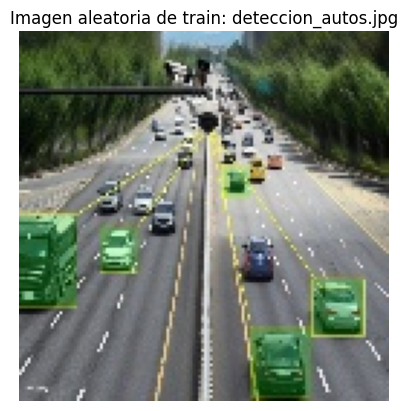

In [52]:
# Usar funcion anterior
mostrar_imagen_aleatoria("/media")